# Введение в многоклассовую классификацию

В бинарной классификации всего два класса (например, «спам» или «не спам»).
В многоклассовой классификации три и более классов (например, определение породы кошки: «Британская», «Сиамская», «Мейн-кун»).

**Примеры многоклассовой классификации:**
- Распознавание рукописных цифр (0-9).
- Классификация животных по фото.
- Определение эмоций по тексту (позитив, нейтрально, негатив).
- Определение вида животных по их характеристикам.


Не все алгоритмы изначально поддерживают работу с несколькими классами. Например, логистическая регрессия, в классическом своем варианте подходит только для бинарной классификации.


Существует несколько стратегий для многоклассовой классиификации, в том числе когда мы можем использовать и бинарные классификаторы.

1. **One-vs-All (OvA, One-vs-Rest).**

В этом случае мы строим K алгоритмов, которые отделяют один определенный класс от всех остальных. Например, если нарисовать в двумерном признаковом пространстве объекты трех классов (K=3), то каждый алгоритм будет определять свою разделяющую гиперплоскость для выделения одного класса от всех остальных.

- Плюсы: у него простая реализация, работает с любым бинарным алгоритмом.
- Минусы: нужно обучать несколько моделей, возможны конфликты предсказаний.

2. **One-vs-One или all-vs-all (все против всех).**

Метод «один-против-одного» (one-vs-one) представляет собой альтернативный метод многоклассовой классификации с помощью набора бинарных классификаторов. Для каждой пары классов создается отдельный классификатор.

Если есть $K=3$ класса (Кот, Собака, Лошадь), то обучаются модели:
- Кот vs Собака.
- Кот vs Лошадь.
- Собака vs Лошадь.

**Итоговое предсказание — класс, победивший в большинстве парных сравнений.**

- Плюсы: более точный метод, так как каждая модель учится на меньших данных.
- Минусы: нужно обучать $\frac{K(K-1)}{2}$ бинарных классификатора.



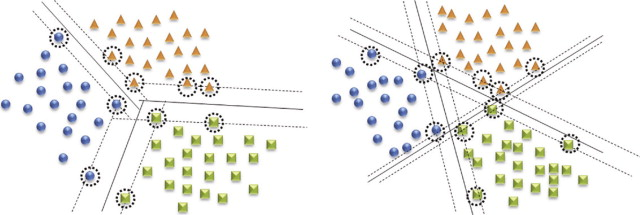

Пример работы SVM для многоклассовой классификации (Слева: All-vs-All (AVA), справа: One-vs-All (OVA)).

# Метод ближайших соседей

**KNN (K-Nearest Neighbors)** — это один из самых простых и популярных алгоритмов машинного обучения с учителем, который может использоваться как для классификации, так и регрессии.

Алгоритм достаточно быстрый, но требует большого объема памяти.

**KNN может быть применен как для решения задач классификации, так и для решения задачи регрессии.**

**Краткий алгоритм работы KNN:**
1. Пусть имеется набор данных, состоящий из $N$ объектов $X_i(i=1,...n)$ для каждого которых задан класс $C_i$.
2. Выбираем число $K$ - количество соседей. $K$ - любое целое число.
3. Далее вычисляется расстояние от каждого объекта  $X_i$  до каждого из объектов  $X$  обучающей выборки.
*Методы расчета расстояния: Евклидово, Манхэттенское или Хэмминговское расстояние.*
4. Выбирается  $K$  объектов, расстояние до которых минимально;
5. Далее объект относится к классу, к которому относится большинство из выбранных $K$ ближайших соседей:

$$a(u) = \underset{y}{\text{argmax}}\sum_{i=1}^{k}[y_{u}^{(i)}=y],$$

то есть провести голосование.


Под задачу регрессии метод адаптируется довольно легко – на 5 шаге возвращается не метка, а число – среднее (или медианное) значение целевого признака среди соседей.

Евклидова метрика

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

Манхэттенская метрика

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

Метрика Минковского:

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

При этом при $q = 1$ получаем манхэттенскую ($L_{1}$) метрику, при $q = 2$ - евклидову ($L_{2}$) метрику.

**Пример.**

Пусть $K = 5$.

$X_i$ - серая точка.

Хотим определить к какому классу она относится.


SimpleKnnExample.png

Описанный выше тип KNN называется Brute-Force, поскольку в нем используется метод полного перебора для поиска ближайших соседей, что делает его простым в реализации, но слишком медленным при работе с большим объемом данных.

Для решения данной проблемы в реализации scikit-learn предусмотрены более продвинутые методы, основанные на бинарных деревьях, что позволяет получить значительный прирост в производительности. Примеры более оптимальных стратегий поиска ближайших соседей: KD-Tree, BallTree.

## Преимущества и недостатки

**Плюсы:**
- Простота реализации и интерпретации.
- Хорошие результаты на малых наборах данных.
- Можно использовать как для классификации, так и для регрессии.

**Минусы:**
- Медленный на больших данных (приходится искать соседей в полном наборе).
- Чувствителен к масштабированию признаков (важно нормализовать данные).
- Плохо работает, если классы сильно пересекаются.


## Вычислительная сложность алгоритма

Чтобы вычислить вычислительную сложность KNN, давайте рассмотрим $d$ - мерное пространство, $k$ — количество соседей, а $n$ — общее количество точек обучающих данных.

Чтобы понять, как мы можем рассчитать сложность этого алгоритма, взгляните на формальный псевдокод! Каждое вычисление расстояния требует $O(d)$ времени выполнения, поэтому расчет для одной точки до всех других требует $O(nd)$ работы. Для каждой итерации на третьем шаге мы выполняем $O(n)$ работы, перебирая наблюдения обучающего набора, поэтому в целом шаг требует $O(nk)$ работы. Первый шаг требует только $O(n)$ работы, поэтому мы получаем время выполнения $O(nd + kn)$.

# Практиктическая реализация

Для начала загрузим датасет. В качестве примера возьмем открытый [датасет](https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset) с платформы Kaggle.

Небольшая [инструкция](https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/) о том, как загрузить датасет с Kaggle сразу в Google Colab.

## Загрузка датасета и подготовка данных

In [4]:
!pip install opendatasets --quiet

In [5]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset")
# {"username":"adele1997","key":"178dfad8b656a812e88356260d0188b4"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset


100%|██████████| 5.00M/5.00M [00:00<00:00, 81.8MB/s]

In [6]:
import pandas as pd

df = pd.read_csv("/content/stellar-classification-dataset/StarClassificationDataset.csv")
df

<ipython-input-6-1bad462cecf7>:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/stellar-classification-dataset/StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.060000e+19,0.000000,9374,57749,438,GALAXY
99996,1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.590000e+18,0.404895,7626,56934,866,GALAXY
99997,1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.110000e+18,0.143366,2764,54535,74,GALAXY
99998,1.240000e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.600000e+18,0.455040,6751,56368,470,GALAXY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

In [8]:
df.columns

Index(['object_ID', 'alpha', 'delta', 'UV_filter', 'green_filter',
       'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD',
       'fiber_ID', 'class'],
      dtype='object')

In [ ]:
columns_X = ['alpha', 'delta', 'UV_filter', 'green_filter',
       'red_filter', 'near_IR_filter', 'IR_filter', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'red_shift', 'plate_ID', 'MJD',
       'fiber_ID', 'class']

Так как мы решаем задачу классификации, то для качественного решения любой задачи классификации важно знать **количественное распределение объектов по классам**:

1. Избегание смещения модели.

2. Если один класс сильно преобладает над другими, модель может просто «запоминать» этот класс и игнорировать остальные.

-----------------------------
Например, если в наборе данных 95% объектов принадлежат к одному классу, модель может достигнуть высокой точности, просто всегда предсказывая этот класс, но это не значит, что она действительно научилась различать классы.

-----------------------------
3. Корректная метрика качества.

В несбалансированных данных традиционные метрики (например, точность) могут быть обманчивыми.

-----------------------------
Например, если в задаче медицинской диагностики 99% анализов — здоровые пациенты, то модель, всегда предсказывающая «здоров», будет иметь точность 99%, но при этом совершенно бесполезна для выявления больных.

-----------------------------
4. Лучшее обобщение модели.

Знание распределения помогает корректно обрабатывать редкие классы и предотвращает переобучение модели на доминирующем классе.

<ipython-input-9-33fd3eedb57c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='class', data = df, palette='hls')


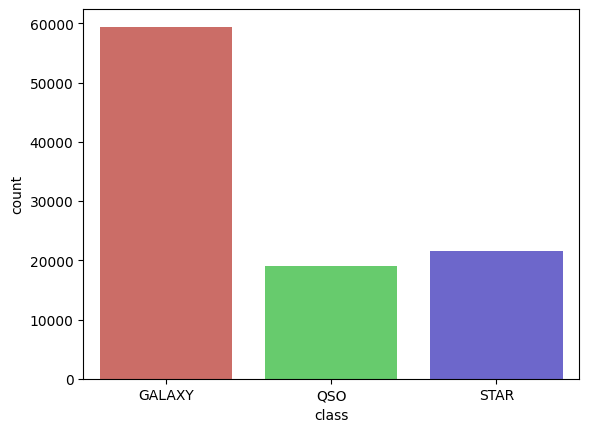

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='class', data = df, palette='hls')
plt.show()

In [ ]:
df['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


Данные показывают значительный дисбаланс классов:
- GALAXY (галактики) — 59,445 объектов (~52%).
- STAR (звезды) — 21,594 объектов (~19%).
- QSO (квазары) — 18,961 объектов (~17%).

**Вывод:**
1. Классы неравномерны, при этом галактики преобладают, а звезды и квазары встречаются почти в три раза реже.
2. Модель может быть смещена в сторону класса GALAXY, так как он доминирует в данных. Если не предпринять меры, алгоритм может чаще предсказывать GALAXY, игнорируя другие классы.
3. Нужны методы балансировки (они будут рассмотрены в следующей лекции).


In [10]:
# Удалим все объекты где есть пропуски
df.dropna(inplace=True)
# Удалим неинформативную колонку
df.drop(columns=['object_ID'], inplace=True)

# Возьмем только числовые колонки
numeric_cols = df.select_dtypes(include='number').columns
df_X = df[numeric_cols]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99991 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   alpha           99991 non-null  object 
 1   delta           99991 non-null  float64
 2   UV_filter       99991 non-null  float64
 3   green_filter    99991 non-null  float64
 4   red_filter      99991 non-null  float64
 5   near_IR_filter  99991 non-null  float64
 6   IR_filter       99991 non-null  float64
 7   run_ID          99991 non-null  object 
 8   rerun_ID        99991 non-null  int64  
 9   cam_col         99991 non-null  int64  
 10  field_ID        99991 non-null  int64  
 11  spec_obj_ID     99991 non-null  float64
 12  red_shift       99991 non-null  float64
 13  plate_ID        99991 non-null  int64  
 14  MJD             99991 non-null  int64  
 15  fiber_ID        99991 non-null  int64  
 16  class           99991 non-null  object 
dtypes: float64(8), int64(6), object(3)
m

In [12]:
from sklearn.preprocessing import LabelEncoder

# Закодируем целевую переменную
# Создание и применение LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

# Создание словаря соответствия
label_mapping = {class_name: index for index, class_name in enumerate(encoder.classes_)}

print(label_mapping)

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}


In [13]:
X = df_X.copy()
y = df['class']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (66660, 14), (66660,)
Test shape: (33331, 14), (33331,)


## Обучение алгоритма

Напомним, что одной из ключевых особенностей библиотеки `Scikit-learn` является унифицированный подход к реализации алгоритмов.

Большинство алгоритмов машинного обучения и методов предобработки данных в этой библиотеке реализовано в виде классов, что делает их использование интуитивно понятным и последовательным:
1. Создание объекта класса (т.е. инициализация алгоритма).
2. Обучение (`fit()`).
3. Применение (`predict()` для алгоритмов ML, `transform()` для алгоритмов предобработки данных).



Метод ближайщих соседей, реализован в библиотеке `sklearn` в модуле `neighbors`.

Для использования необходимо явным образом указывать сколько соседей необходимо учитывать (если не указывать по умолчанию будет 5).

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

`sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`

1. `n_neighbors` - количество соседей
2. `weights` - функция для весов:
-  `uniform` - однородные веса. Все точки в каждой окрестности имеют одинаковый вес.
- `distance` - точки веса обратно пропорциональны их расстоянию. в этом случае более близкие соседи точки запроса будут иметь большее влияние, чем соседи, которые находятся дальше.
3. `algorithm` - Алгоритм, используемый для вычисления ближайших соседей.
4. `metric` - метод расчета расстояния (евклидово, манххэтонское и т.д.)

In [16]:
%%time

from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# Список для хранения всех вариантов модели
# и метрик для каждой из них
scores = []

# переберем соседей от 3 до 16 включительно
for i in range(3, 17):
    # словарь для сохренение метрик для одной модели
    score = {}
    # создаем модель с количеством соседей i
    knn = KNeighborsClassifier(i)
    # обучаем модель
    knn.fit(X_train,y_train)
    # метод predict возвращает вектор ответов для X_test
    answers = knn.predict(X_test)

    # Оцениваем KNN  с кол-вом сосдей i и сохраняем
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    scores.append(score)

# вывод всех вариантов и их метрик
scores = pd.DataFrame(scores)
scores

,k,accuracy
0,3,0.689358
1,4,0.698179
2,5,0.699739
3,6,0.703249
4,7,0.703549
5,8,0.704719
6,9,0.704809
7,10,0.706009
8,11,0.707510
9,12,0.707270


In [17]:
scores[scores['accuracy'] == scores['accuracy'].max()]

,k,accuracy
12,15,0.70796


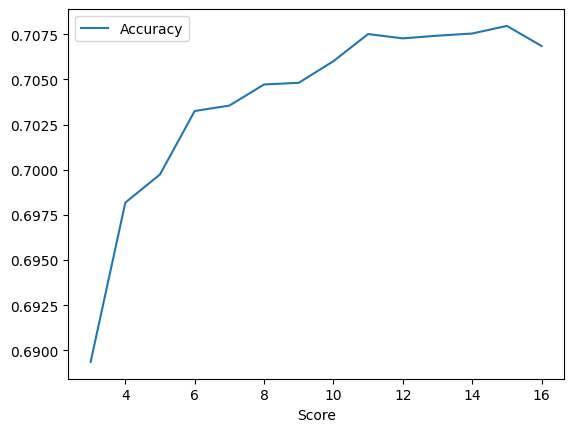

In [19]:
import matplotlib.pyplot as plt

plt.plot(scores['k'], scores['accuracy'], label='Accuracy')
plt.xlabel('K')
plt.xlabel('Score')
plt.legend()

После того, как вы подобрали оптимальные гиперпараметры модели (в данном случае количество соседей), заново обучаем ее с этими гиперпараметрами и используем.

In [20]:
knn = KNeighborsClassifier(15)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

# Интерпретация метрик многоклассовой классификации

Мы уже изучали метрики классификации и смотрели на их использование и интерпретацию для бинарной классификации:
- Accuracy.
- Precision.
- Recall.
- F1-Score.

В целом, для многоклассовой классификации мы будем использовать эти же метрики, но с учетом различных нюансов.


## Матрица ошибок (Confusion Matrix) в многоклассовой классификации

В бинарной классификации она имеет размер 2x2, но в многоклассовом случае ее размер становится $C \times C$, где $C$ — количество классов.

Пример матрицы ошибок для 3 классов (A, B, C):

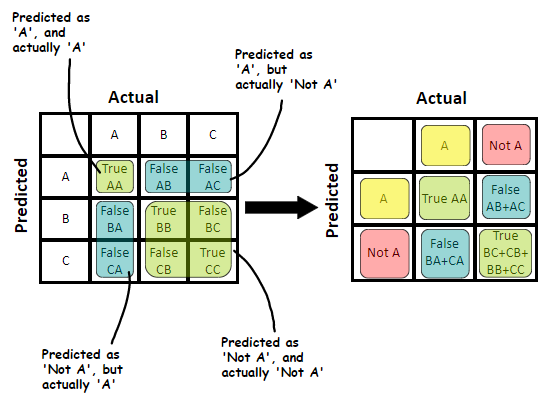

Диагональные элементы $(AA, BB, CC)$ — это корректные предсказания (True Positives): объект принадлежит к классу $A$, и модель определила его в класс $A$ и пр. Остальные элементы — это ошибки модели, но по разным классам.

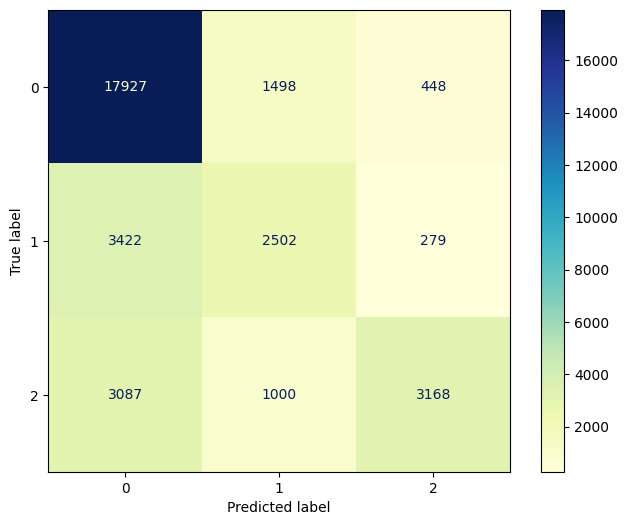

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)

display.plot(ax=ax, cmap='YlGnBu')

В этой матрице строки — это фактические классы, а столбцы — предсказанные классы:
- Первая строка (GALAXY): 17927 объектов предсказаны верно (TP), но 1498 ошибочно классифицированы как STAR, а 448 — как QSO.
- Вторая строка (STAR): 2502 объектов предсказаны верно, но 3422 приняты за GALAXY, а 279 — за QSO.
- Третья строка (QSO): 3168 объектов предсказаны верно, но 3087 приняты за GALAXY, а 1000 — за STAR.


Таким образом, для класса GALAXY общее число ошибок будет равно 1498 + 448. Аналогично для других классов.

## Как быть с Accuracy, Precision, Recall и F1

В многоклассовой классификации метрики Precision, Recall, Accuracy и F1-score рассчитываются либо для каждого класса отдельно, либо усредняются разными способами (macro, micro, weighted).

**Precision (точность)**

Precision измеряет, насколько точно предсказания модели соответствуют фактическому классу.

В общем случае для многоклассовой классификации метрика рассчитывается так:
$$Precision_i​= \frac{TP_i}{TP_i​+FP_i​}$$

- $TP_i$ (True Positives) — количество объектов, правильно предсказанных как класс $i$,
- $FP_i​$ (False Positives) — количество объектов, ошибочно предсказанных как класс $i$, но относящихся к другому классу.

**Усреднение:**
- Macro Precision.
- Micro Precision.
- Weighted Precision.

**Посмотрим на примере, как считается Precision.**

Для начала рассчитывается Precision для каждого класса отдельно:

1. Precision (GALAXY):
$$\frac{17927}{17927+3422+3087} = \frac{17927}{24436}​≈0.734$$

**Интерпретация:** из всех объектов, которые модель предсказала как GALAXY (24 436 объектов), 73,4% действительно галактики, а 26,6% — это звезды или квазары, ошибочно принятые за галактики.

**Ошибка:** модель часто путает звезды и квазары с галактиками (3,422 и 3,087 ошибок соответственно).

2. Precision (STAR):

$$\frac{2502}{2502+1498+1000} = \frac{2502}{5000}≈0.500$$

**Интерпретация:** из всех объектов, которые модель предсказала как STAR (5000 объектов), только 50% действительно звезды, а 50% — это другие объекты (ошибки).

**Ошибка:** почти половина предсказанных звезд (1498 + 1000 = 2498 объектов) на самом деле являются галактиками или квазарами.
Этот класс имеет самый низкий Precision, значит, модель плохо отличает звезды от других объектов.

3. Precision (QSO):

$$\frac{3168}{3168 + 448 + 279} = \frac{3168}{3895} ​≈0.813$$

**Интерпретация:** из всех объектов, которые модель предсказала как QSO (3895 объектов), 81,3% — действительно квазары, а 18,7% ошибочно оказались галактиками или звездами.

**Ошибка:** модель реже путает другие объекты с квазарами (448 и 279 ошибок).

Этот класс имеет самый высокий Precision, значит, если модель предсказывает QSO, это, скорее всего, действительно квазар.

-----------

**Итоговый Precision можно подсчитать двумя способами:**

- Macro Precision (средний Precision по всем классам):

$$Precision_{macro}=\frac{Precision_{GALAXY} + Precision_{STAR}+Precision_{QSO3}}{3}$$

$$Precision_{macro} = \frac{0.734 + 0.500 + 0.813}{3} = \frac{2.047}{3}​≈0.682$$

- Weighted Precision (Precision, взвешенный по количеству объектов каждого класса):

$$Precision_{weighted}=\frac{Precision_{GALAXY}+Precision_{STAR}+Precision_{QSO3}}{w1+w2+w3}$$

- $w_i$ — количество объектов каждого класса.

$$Precision_{weighted} = \frac{59445 \cdot 0.734 + 21594 \cdot 0.500 + 18961 \cdot 0.813}{59445 + 21594 + 18961}≈0.698$$

--------

Метрики Recall, F1-score рассчитываются по аналогичным образом.


In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print()

# 2. Precision (по классам и усреднённый)
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f"Precision Macro: {precision_macro:.4f}")
print(f"Precision Micro: {precision_micro:.4f}")
print(f"Precision Weighted: {precision_weighted:.4f}")
print()

# 3. Recall (по классам и усреднённый)
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print(f"Recall Macro: {recall_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}")
print(f"Recall Weighted: {recall_weighted:.4f}")
print()

# 4. F1-score (по классам и усреднённый)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")
print()

# 5. Матрица ошибок (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print()

# 6. Подробный отчёт по классам
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7080
Precision Macro: 0.6825
Precision Micro: 0.7080
Precision Weighted: 0.7076
Recall Macro: 0.5807
Recall Micro: 0.7080
Recall Weighted: 0.7080
F1 Macro: 0.6080
F1 Micro: 0.7080
F1 Weighted: 0.6893
Confusion Matrix:
[[17927  1498   448]
 [ 3422  2502   279]
 [ 3087  1000  3168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81     19873
           1       0.50      0.40      0.45      6203
           2       0.81      0.44      0.57      7255

    accuracy                           0.71     33331
   macro avg       0.68      0.58      0.61     33331
weighted avg       0.71      0.71      0.69     33331



In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[17927,  1498,   448],
       [ 3422,  2502,   279],
       [ 3087,  1000,  3168]])